In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from scipy.signal import find_peaks






#TEST MAKE SURE ITS WORKING BECAUSE SAVE PROBLEM






#Constants
a=1e-3
w=0.8
v=0.024
K=10
rho=0.005
tau=30
beta=100
gamma=10
#modFrequency=0.004
m=0.78
sigma=12
t_start=0
t_end=400000
transient=300000
t_eval=np.linspace(t_start, t_end, 1000000)

Sweep=np.linspace(0.00,0.0045,500)
ValuesTurning = []
BTurning = []

In [22]:

#Initial state of system
initialState=[0.1,0,1,12]

#ODE model for chemostat
def odeModel(t,y):
    B,I,P,S=y
    B_dot=v*B*(S/(S+K)) - B*(rho+a*w*P)
    I_dot=a*w*B*P - I*(rho + 1/tau)
    P_dot=1e-6-P*(rho + a*(B+I)) + beta*(I/tau)
    S_dot=rho*(resourceFlow(t)-S) - gamma*v*B*(S/(S+K))

    return [B_dot,I_dot,P_dot,S_dot]

#returns resource flow to chemostat
def resourceFlow(t):

    return sigma*(1-(m/2)*(1+np.sin(modFrequency*t)))

0.0
9.018036072144287e-06
1.8036072144288575e-05
2.705410821643286e-05
3.607214428857715e-05
4.509018036072144e-05
5.410821643286572e-05
6.312625250501002e-05
7.21442885771543e-05
8.116232464929858e-05
9.018036072144288e-05
9.919839679358716e-05
0.00010821643286573144
0.00011723446893787574
0.00012625250501002003
0.00013527054108216431
0.0001442885771543086
0.00015330661322645288
0.00016232464929859716
0.00017134268537074147
0.00018036072144288575
0.00018937875751503003
0.00019839679358717432
0.0002074148296593186
0.00021643286573146288
0.0002254509018036072
0.00023446893787575147
0.00024348697394789575
0.00025250501002004006
0.0002615230460921843
0.00027054108216432863
0.0002795591182364729
0.0002885771543086172
0.0002975951903807615
0.00030661322645290576
0.00031563126252505007
0.0003246492985971943
0.00033366733466933863
0.00034268537074148294
0.0003517034068136272
0.0003607214428857715
0.00036973947895791576
0.00037875751503006007
0.0003877755511022044
0.00039679358717434863
0.0004

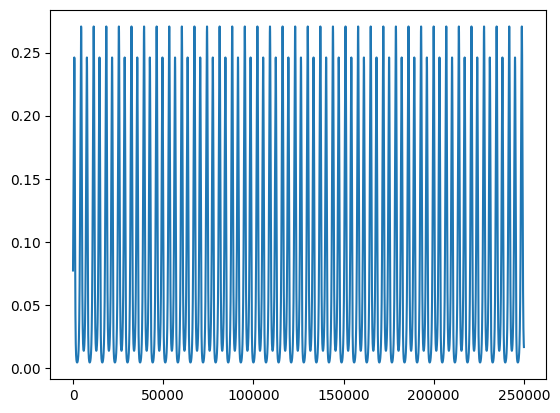

In [23]:

currentState=initialState
for modFrequency in Sweep:
    print(modFrequency)
    solution = solve_ivp(odeModel,
                     [t_start,t_end],
                     currentState,method='RK45',t_eval=t_eval)

    currentState=solution.y[:, -1]

    temp=solution.t >= transient
    B_sol=solution.y[0]
    B=B_sol[temp]
    dB=np.diff(B)
    dBsign = np.sign(dB)
    turningPoints=np.where(np.diff(dBsign) != 0)[0] + 1

    if np.mean(B)<1e-8:
        currentState=initialState

    for idx in turningPoints:
        if idx < len(B):
            BTurning.append(B[idx])      
            ValuesTurning.append(modFrequency)

plt.plot(B)
plt.show()


Text(0, 0.5, 'B')

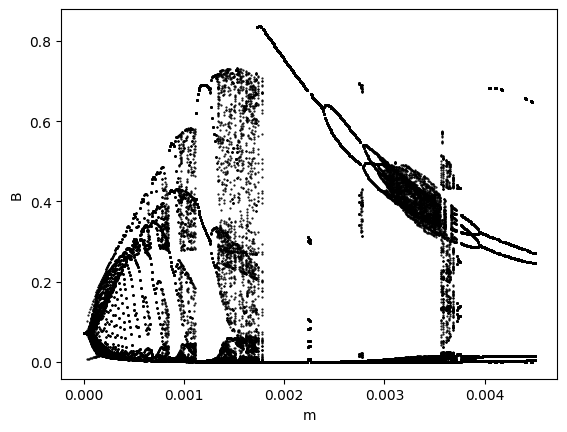

In [24]:

plt.scatter(ValuesTurning, BTurning, color='black',s=0.3)
plt.xlabel("m")
plt.ylabel("B")